In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib as mpl

In [6]:
# Path ke folder data CSV
folder_path = '../formatted_data/'  # Ganti dengan path folder yang benar
csv_files = ["1.5 7.0 1.csv", "1.5 7.0 2.csv", "1.5 7.0 3.csv",
             "1.0 7.0 1.csv", "1.0 7.0 2.csv", "1.0 7.0 3.csv",
             "2.0 7.0 1.csv", "2.0 7.0 2.csv", "2.0 7.0 3.csv",
             "1.5 6.0 1.csv", "1.5 6.0 2.csv", "1.5 6.0 3.csv",
             "1.5 8.0 1.csv", "1.5 8.0 2.csv", "1.5 8.0 3.csv"]

In [7]:
# function to remove value x in list "data"
def remove_value(data, x):
    return [value for value in data if value != x]

# function to find average of flat peak
def avg_peak(x, y, peak):
    flat_peak = [x[peak]]
    
    #check backward
    i=1
    while(y[peak-i] == y[peak]):
        flat_peak.append(x[peak-i])
        i+=1
    
    #check forward
    i=1
    while(y[peak+i] == y[peak]):
        flat_peak.append(x[peak+i])
        i+=1
    
    return sum(flat_peak)/len(flat_peak)

# adjust ylim for all
def adjust_ylim(variasi_ke, lim_var_1 = None, lim_var_2 = None, lim_var_3 = None, lim_var_4 = None, lim_var_5 = None, ax=None):
    if(ax==None):
        if(variasi_ke == 1 and lim_var_1 != None):
            plt.ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            plt.ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            plt.ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            plt.ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            plt.ylim(lim_var_5)
    else:
        if(variasi_ke == 1 and lim_var_1 != None):
            ax.set_ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            ax.set_ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            ax.set_ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            ax.set_ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            ax.set_ylim(lim_var_5)

AttributeError: 'Axes' object has no attribute 'xlabel'

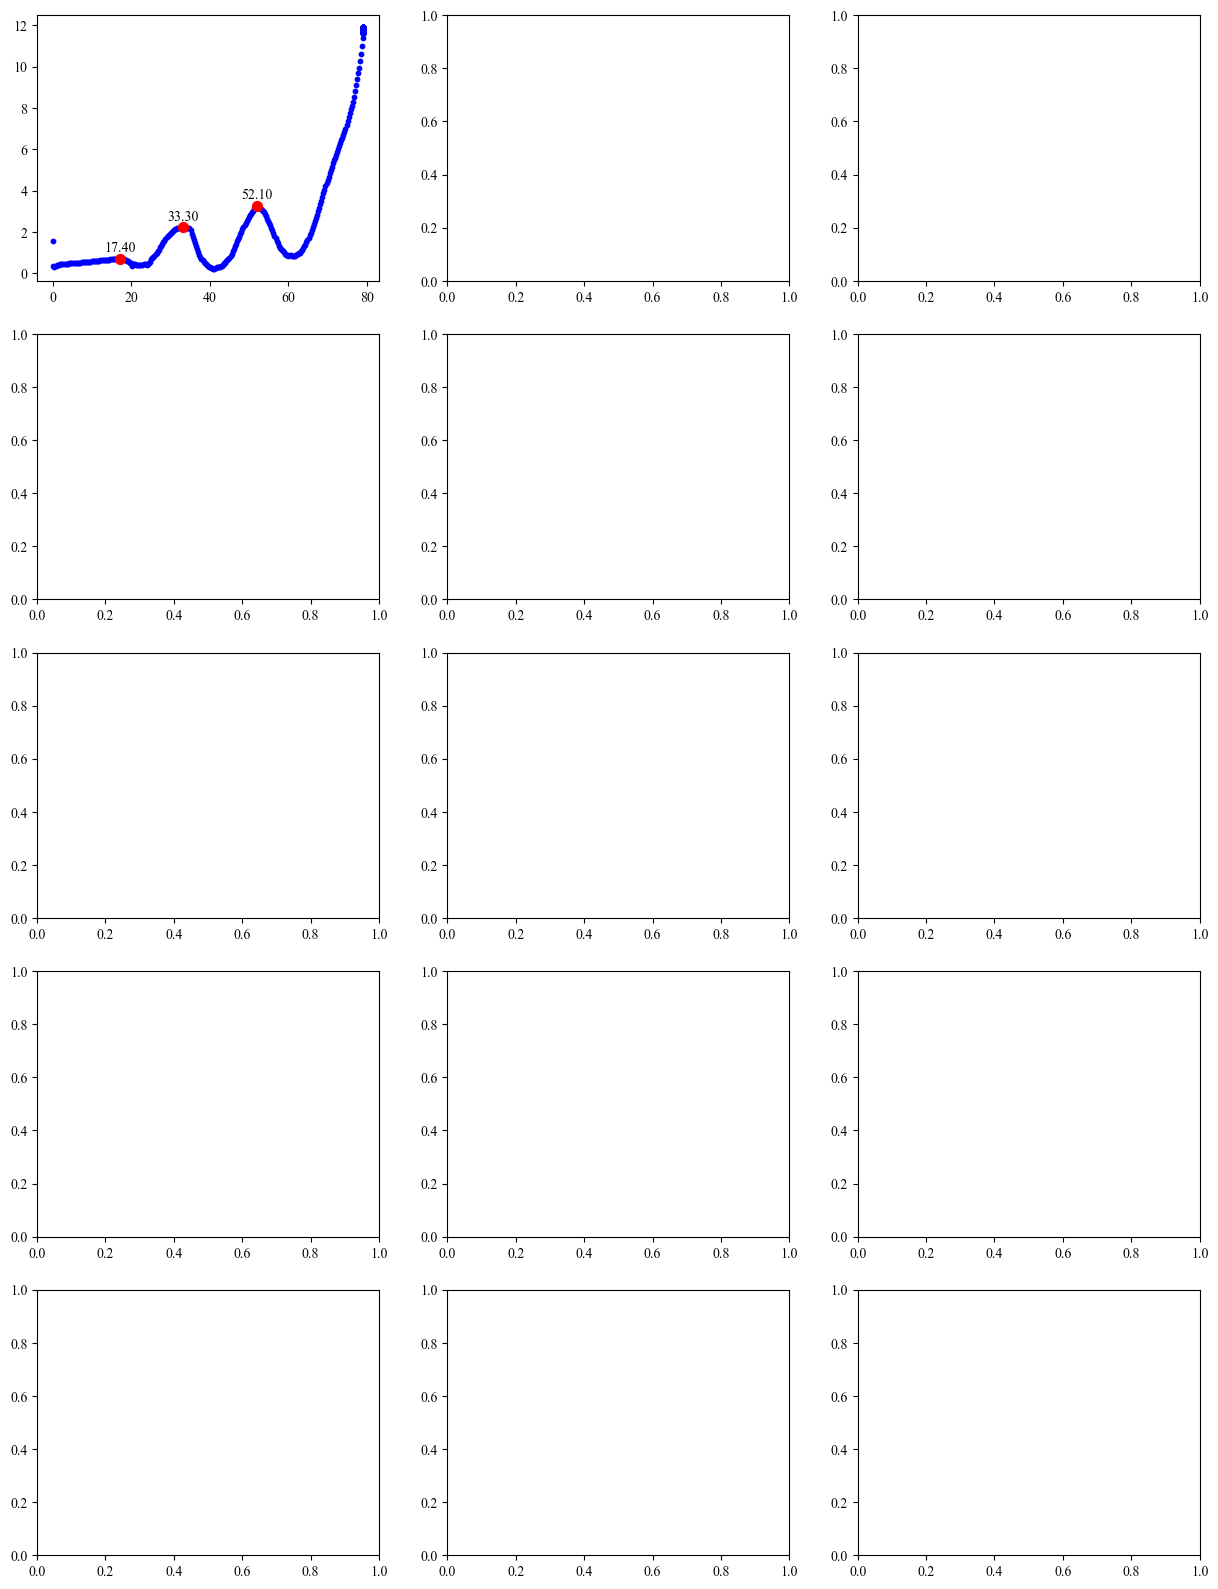

In [8]:
# gambaran semuanya

# Set up a figure with subplots
num_sheets = len(csv_files)  # Adjusts based on the actual number of sheets
n=0

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Set up a figure with 5x3 subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust size as needed
axes = axes.flatten()  # Flatten to simplify indexing

# Loop through each sheet
for i, csv_file in enumerate(csv_files[:15]):  
    n+=1 # grafik ke berapa
    variasi_ke = (n-1) // 3 + 1
    percobaan_ke = n % 3
    if(percobaan_ke == 0):
        percobaan_ke +=3

    # Load data from the current sheet
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path, sep=';')
    
    # Assuming 'x' and 'y' columns in each sheet
    x = data['Acceleration voltage U_B / V']
    y = data['Collector current I_A / nA']
    
    # Find local peaks in the y data
    peaks0, _ = find_peaks(y, distance=30)
    if(n==7): # fine tune graph ke4
        y_dummy = y.copy()
        y_dummy[:52] = [0 for i in range(52)]
        peaks0, _ = find_peaks(y_dummy, distance=30)

    # remove x lower than 10V, higher than 70V
    peaks1 = np.array(peaks0)
    threshold_x= 255
    peaks = peaks1[(peaks1 <= 274) & (peaks1 >=25)]
    if(n==4):
        peaks = peaks1[(peaks1 <= 255) & (peaks1 >=25)]
    # print(peaks)

    peaks2 = peaks.copy()
    ref = y[peaks[0]]
    for j in peaks:
        if(y[j]<ref):
            peaks2 = remove_value(peaks,j)
        
        else:
            ref= y[j]
    peaks = peaks2

    # Plot on the corresponding subplot
    ax = axes[i]
    # Scatter plot for the current sheet 
    # ax.figure(figsize=(10, 6))
    ax.scatter(x, y, color='blue', s=10, label=('Data Percobaan '+str(percobaan_ke)))
    ax.scatter(x[peaks], y[peaks], color='red', s=50, label='Titik Maksimum Lokal')
    
    # Annotate each peak with its x-coordinate
    for peak in peaks:
        x_peak_avg = avg_peak(x, y, peak)
        ax.annotate(f"{x_peak_avg:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,5), ha='center')
    
    # Set titles and labels for each subplot
    ax.set_xlabel('Tegangan Pemercepat [$U_{2}$] (V)', fontsize=15, fontweight='bold')
    ax.set_ylabel('Arus Kolektor [I] (nA)', fontsize=15, fontweight='bold')
    ax.set_xticks(fontsize=12)
    ax.set_yticks(fontsize=12)
    ax.legend(fontsize=12, loc='upper left')
    ax.set_title(f'Sheet: {csv_file}')
    adjust_ylim(variasi_ke, (-0.5,13.5), (0.2, 1.4), (-0.5, 13.5), (-0.5, 13.5), (-0.5, 5.5), ax)

    # Save the figure with high resolution
    # plt.savefig(f'figs/var{variasi_ke}/{csv_file}.png', dpi=300, bbox_inches='tight')  # Adjust dpi as needed

plt.tight_layout()
plt.show()